# Tutorial 3 - Recommender Systems

Jairo El Yazidi Rios

Tea Shkurti

The primary goal of this tutorial is to provide a comprehensive understanding of how sparse recommender systems are stored and how to effectively utilize sparse matrices. Additionally, the tutorial aims to guide learners through the process of implementing matrix factorization algorithm for recommenders.

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset

In [ ]:
ratings = np.load("ROMEGA.npy").astype(int)
ratings

array([[   0,  456,    1],
       [   0,  314,    1],
       [   0,  234,    3],
       ...,
       [ 901, 1054,    3],
       [ 901,  141,    3],
       [ 901, 1423,    1]])

Some statistics of the dataset

In [ ]:
users = np.unique(ratings[:,0])
print(f"Users ids: {users[0:10]}")
items = np.unique(ratings[:,1])
print(f"Items ids: {users[0:10]}")

print(f"# of users: {users.shape[0]}")
print(f"# of items: {items.shape[0]}")
print(f"# of observed entries: {ratings.shape[0]}")
print(f"# of possible entries: {users.shape[0]*items.shape[0]}")

print(f"% of observed entries: {ratings.shape[0]/(users.shape[0]*items.shape[0])}")


Users ids: [0 1 2 3 4 5 6 7 8 9]
Items ids: [0 1 2 3 4 5 6 7 8 9]
# of users: 902
# of items: 1500
# of observed entries: 97499
# of possible entries: 1353000
% of observed entries: 0.07206134515890614


The focus of this dataset is on providing movie recommendations to users. Due to privacy concerns, user information is not disclosed. However, the dataset does include information on the first twenty movies that each user has interacted with. This information can be used to build recommender systems that recommends new movies to users based on their past movie preferences.



| Movie Index | Title | IMDB |
| --- | --- | --- |
| 0 | Ace Ventura: Pet Detective    |[Link](https://www.imdb.com/title/tt0109040/?ref_=fn_al_tt_1) |
| 1 | Back to the Future   |[Link](https://www.imdb.com/title/tt0088763/?ref_=nv_sr_srsg_0) |
| 2 | Citizen Kane   |[Link](https://www.imdb.com/title/tt0033467/?ref_=nv_sr_srsg_0) |
| 3 | Dirty Dancing     |[Link](https://www.imdb.com/title/tt0092890/?ref_=nv_sr_srsg_0) |
| 4 | E.T. the Extra-Terrestrial   |[Link](https://www.imdb.com/title/tt0083866/?ref_=nv_sr_srsg_0) |
| 5 | Forrest Gump     |[Link](https://www.imdb.com/title/tt0109830/?ref_=fn_al_tt_1) |
| 6 | Free Willy     |[Link](https://www.imdb.com/title/tt0106965/?ref_=nv_sr_srsg_0) |
| 7 | Ghost    |[Link](https://www.imdb.com/title/tt0099653/?ref_=nv_sr_srsg_3) |
| 8 | GoldenEye     |[Link](https://www.imdb.com/title/tt0113189/?ref_=nv_sr_srsg_0) |
| 9 | Home Alone    |[Link](https://www.imdb.com/title/tt0099785/?ref_=nv_sr_srsg_0) |
| 10 | Independence Day (ID4)    |[Link](https://www.imdb.com/title/tt0116629/?ref_=nv_sr_srsg_2) |
| 11 | Jurassic Park    |[Link](https://www.imdb.com/title/tt0107290/?ref_=nv_sr_srsg_0) |
| 12 | Mortal Kombat   |[Link](https://www.imdb.com/title/tt0113855/?ref_=nv_sr_srsg_3) |
| 13 | Pulp Fiction    |[Link](https://www.imdb.com/title/tt0110912/?ref_=nv_sr_srsg_0) |
| 14 | Terminator 2: Judgment Day   |[Link](https://www.imdb.com/title/tt0103064/?ref_=nv_sr_srsg_0) |
| 15 | The Godfather    |[Link](https://www.imdb.com/title/tt0068646/?ref_=nv_sr_srsg_0) |
| 16 | The Lion King    |[Link](https://www.imdb.com/title/tt0110357/?ref_=nv_sr_srsg_3) |
| 17 | The Mask    |[Link](https://www.imdb.com/title/tt0110475/?ref_=nv_sr_srsg_0) |
| 18 | Toy Story     |[Link](https://www.imdb.com/title/tt0114709/?ref_=nv_sr_srsg_0) |
| 19 | Willy Wonka and the Chocolate Factory    |[Link](https://www.imdb.com/title/tt0067992/?ref_=nv_sr_srsg_0) |



Store in a dense format

In [ ]:
m=users.shape[0]
n=items.shape[0]
R_dense = np.repeat(np.nan,m*n).reshape(m,n)
R_dense[ratings[:,0],ratings[:,1]] = ratings[:,2]
R_dense

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 5.,  5., nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  4., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Store in a sparse format

In [ ]:
R_sparse = csr_matrix((ratings[:,2] * 1., (ratings[:,0], ratings[:,1])), shape=(m, n))
R_sparse

<902x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 97499 stored elements in Compressed Sparse Row format>

In [ ]:
R_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 5., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ratings[:,0:2], ratings[:,2], test_size=0.05, random_state=42)
ratings_train = np.c_[X_train,y_train]
ratings_test = np.c_[X_test,y_test]
print(f"Train : {ratings_train.shape} Test: {ratings_test.shape}")
ratings_train

Train : (92624, 3) Test: (4875, 3)


array([[161, 154,   3],
       [ 16, 739,   3],
       [ 28, 669,   3],
       ...,
       [407, 372,   4],
       [  3, 849,   2],
       [ 40, 433,   3]])

**Alternating Least Squares Matrix Factorization**

_Code adapted from:_ [GITHUB](https://github.com/mickeykedia/Matrix-Factorization-ALS)

In [ ]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    '''
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    '''
    print("Initiating ")
    n, m = A.shape;
    Users = 5 * np.random.rand(n, n_factors)
    Items = 5 * np.random.rand(n_factors, m)

    def get_error(A, Users, Items, R):
        # This calculates the MSE of nonzero elements
        return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)
    MSE_List = []
    print("Starting Iterations")
    for iter in range(n_iterations):
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(np.dot(Items, np.dot(np.diag(Ri), Items.T)) + lambda_ * np.eye(n_factors),
                                       np.dot(Items, np.dot(np.diag(Ri), A[i].T))).T
        for j, Rj in enumerate(R.T):
            Items[:,j] = np.linalg.solve(np.dot(Users.T, np.dot(np.diag(Rj), Users)) + lambda_ * np.eye(n_factors),
                                     np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])))
        MSE_List.append(get_error(A, Users, Items, R))
        print(f"{iter} iteration is complete...")
    print(MSE_List)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
    plt.title('Python Implementation MSE by Iteration \n with %d users and %d movies' % A.shape);
    plt.show()
    return Users, Items

Preparing the data for ALS

In [ ]:
R_sparse_train = csr_matrix((ratings_train[:,2] * 1., (ratings_train[:,0], ratings_train[:,1])), shape=(m, n))
R_Train = R_sparse_train.toarray()
R_mask= R_Train.copy()
R_mask[R_Train!=0] = 1

print(R_Train)
print(R_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [5. 5. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Running ALS

In [ ]:
U,V_T = runALS(R_Train, R_mask, n_factors = 5, n_iterations = 5, lambda_ = 1)

Initiating 
Starting Iterations


KeyboardInterrupt: ignored

Predicting the full matrix

In [ ]:
R_pred = U @ V_T
print(f"U shape: {U.shape}")
print(f"V shape: {V_T.T.shape}")
print(f"R_pred = U @ V_T shape: {R_pred.shape}")
R_pred

NameError: ignored

MSE with full matrix prediction

In [ ]:
pred_test = R_pred[ratings_test[:,0],ratings_test[:,1]]
np.sum((ratings_test[:,2]-pred_test)**2)/pred_test.shape[0]

NameError: ignored

MSE with low-rank structure

In [ ]:
pred_test_sparse =np.sum(U[ratings_test[:,0],:] * (V_T[:,ratings_test[:,1]]).T,axis=-1)
np.sum((ratings_test[:,2]-pred_test_sparse )**2)/pred_test_sparse .shape[0]

Predictiing all movies to user 231

In [ ]:
u231 = U[231,:] @ V_T
print(u231.shape)
np.argsort(u231)

Predicting how all users would like movie 13

In [ ]:
m13 = U @  V_T[:,13]
print(m13.shape)
m13

# Short Challenge

We are going to have a short contest in which we will split the class into groups of three individuals. Your task is to use matrix factorization and cross-validation to achieve the best performance (lowest MSE). Here's what you need to do:

* Rate 3 to 5 of the movies from the table given above and add this information to the end of the data set. For example, if you rate _Home Alone_ as 4 stars, add the entry np.array([902,9,3]) to the data set.
* Find the best hyperparameters $\lambda$, $n\_interactions$, and $n\_factors$ using one of the validation procedures that we have covered in a previous lecture
* Predict all the ratings for user 0 using the best hyperparameters that you found. Save the predicted ratings in an array and then save the array in a file with the extension _.npy_. For example, you can use _np.save("/home/name_group.npy",u0)_.
* At the end of the class, we will evaluate who made the best predictions based on the mean squared error (MSE) for the unobserved entries.

In [ ]:
#your code here
ratings=np.append(ratings,np.array([[902,9,2]]),axis=0)
ratings=np.append(ratings,np.array([[902,43,1]]),axis=0)
ratings=np.append(ratings,np.array([[902,221,3]]),axis=0)
ratings=np.append(ratings,np.array([[902,99,4]]),axis=0)


In [ ]:
ratings

array([[  0, 456,   1],
       [  0, 314,   1],
       [  0, 234,   3],
       ...,
       [902,  43,   1],
       [902, 221,   3],
       [902,  99,   4]])

In [ ]:
def get_error(A, Users, Items, R):
    # This calculates the MSE of nonzero elements
    return np.sum(R * (A - np.dot(Users, Items))) ** 2 / np.sum(R)


Initiating 
Starting Iterations
0 iteration is complete...
1 iteration is complete...
2 iteration is complete...
3 iteration is complete...
4 iteration is complete...
5 iteration is complete...
6 iteration is complete...
[0.26413626956778774, 0.15096146116173526, 0.11341402424805586, 0.09368051595129216, 0.08126238715005898, 0.0726811936859672, 0.0663651901178047]


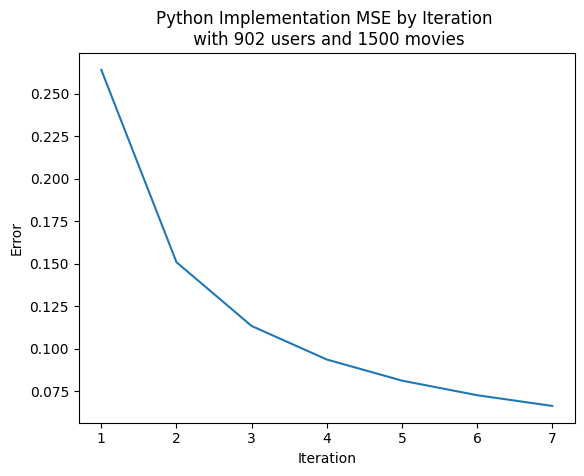

Initiating 
Starting Iterations
0 iteration is complete...
1 iteration is complete...
2 iteration is complete...
3 iteration is complete...
4 iteration is complete...
5 iteration is complete...
6 iteration is complete...
[0.3511448988339061, 0.1750146802268137, 0.12735058805498783, 0.10378944656246532, 0.08932694230290061, 0.07945546552365246, 0.07225594897063208]


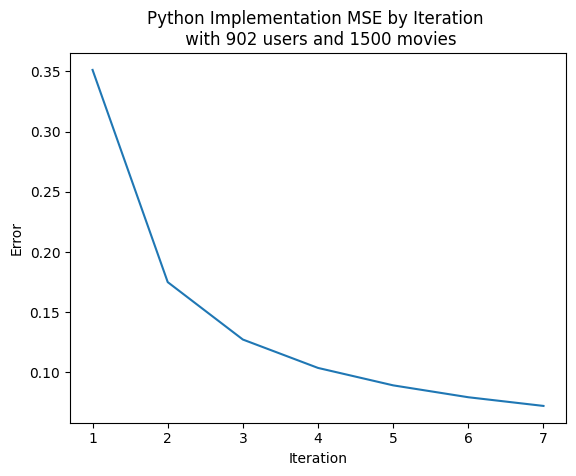

Initiating 
Starting Iterations
0 iteration is complete...
1 iteration is complete...
2 iteration is complete...
3 iteration is complete...
4 iteration is complete...
5 iteration is complete...
6 iteration is complete...
[1.153137138614045, 0.4105564777718746, 0.25231188017299505, 0.18111216812937792, 0.1437569795646006, 0.12112076707455889, 0.1060127136521751]


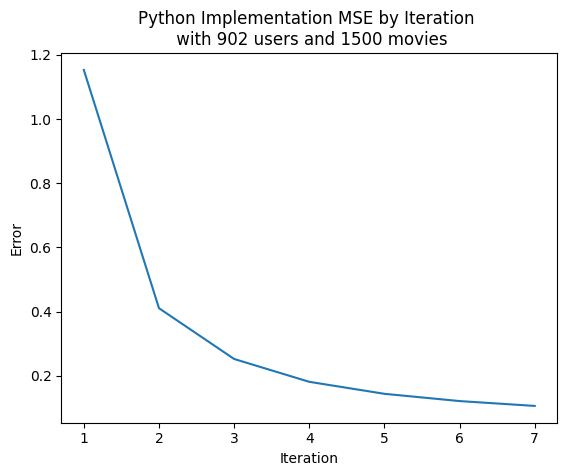

Initiating 
Starting Iterations
0 iteration is complete...
1 iteration is complete...
2 iteration is complete...
3 iteration is complete...
4 iteration is complete...
5 iteration is complete...
6 iteration is complete...
[5.803242258860213, 1.076618968029418, 0.5735714910068722, 0.4759318035031748, 0.44319908328380214, 0.4270548083248999, 0.4176407469578199]


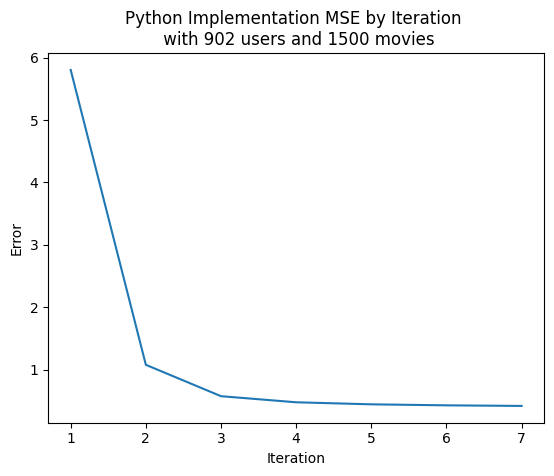

Initiating 
Starting Iterations
0 iteration is complete...
1 iteration is complete...
2 iteration is complete...
3 iteration is complete...
4 iteration is complete...
5 iteration is complete...
6 iteration is complete...


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import KFold

lambda_ = [0.01, 0.1, 1.0, 10.0]
n_iterations = [7, 10, 15]
n_factors = [50, 100, 200]

X_train, X_val, y_train, y_val = train_test_split(ratings_train[:,0:2], ratings_train[:,2], test_size=0.1, random_state=42)
ratings_train2 = np.c_[X_train,y_train]
ratings_val = np.c_[X_test,y_test]

R_sparse_train = csr_matrix((ratings_train2[:,2] * 1., (ratings_train2[:,0], ratings_train2[:,1])), shape=(m, n))
R_TrainT = R_sparse_train.toarray()
R_maskT= R_TrainT.copy()
R_maskT[R_Train!=0] = 1

R_sparse_val = csr_matrix((ratings_val[:,2] * 1., (ratings_val[:,0], ratings_val[:,1])), shape=(m, n))
R_Val = R_sparse_val.toarray()
R_maskV= R_Val.copy()
R_maskV[R_Val!=0] = 1

best_mse = float('inf')
best_params = None

for factors in n_factors:
    for iterations in n_iterations:
        for lamb in lambda_:
            Users, Items = runALS(R_TrainT, R_maskT, factors, iterations, lamb)
            mse = get_error(R_Val, Users, Items, R_maskV)
            if mse < best_mse:
                best_mse = mse
                best_params = (factors, iterations, lamb)

print("Best hyperparameters:", best_params)
print("Best MSE:", best_mse)

In [ ]:
Users, Items = runALS(R_Train, R_mask, best_params[0], best_params[1], best_params[2])

u0 = Users[0,:] @ Items
print(u0.shape)
np.argsort(u0)
np.save("/home/tea_jairo.npy",u0)

TypeError: ignored